In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('../dataset/auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.shape

(398, 9)

In [5]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [6]:
df['origin'] = df['origin'].map({1: 'america', 2: 'europe', 3: 'asia'})
df['origin']

0      america
1      america
2      america
3      america
4      america
        ...   
393    america
394     europe
395    america
396    america
397    america
Name: origin, Length: 398, dtype: object

In [7]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,america,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,america,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,america,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,america,chevy s-10


In [8]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

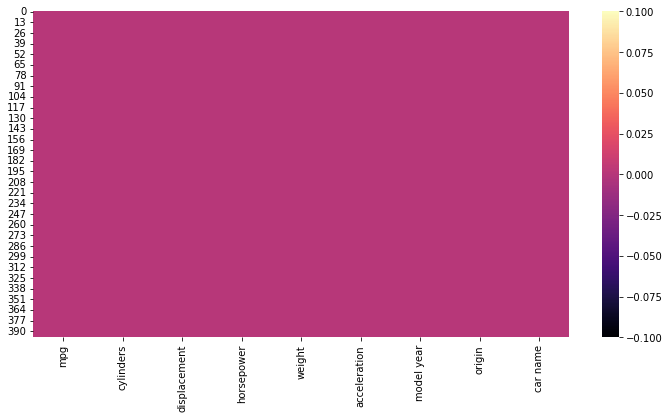

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cmap='magma')
plt.show()

In [10]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

In [11]:
df[~df['horsepower'].str.isdigit()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,america,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,america,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,america,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,america,amc concord dl


In [12]:
df['horsepower'] = df['horsepower'].replace('?', np.nan, regex=False)

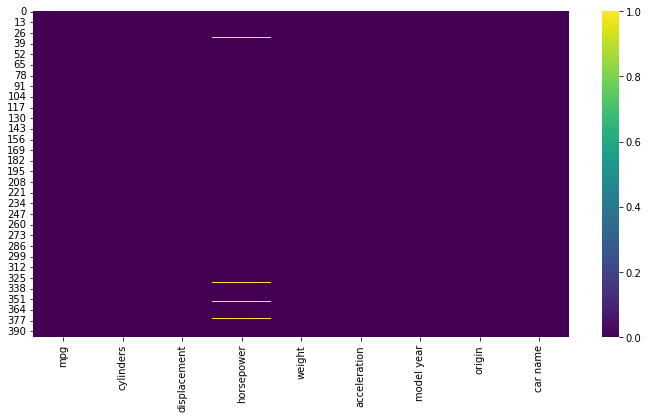

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=True, cmap='viridis')
plt.show()

In [14]:
hpna_df = pd.DataFrame(df[df['horsepower'].isna()])
hpna_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,america,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,america,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,america,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,america,amc concord dl


In [15]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df.iloc[hpna_df.index.values]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,93.5,2046,19.0,71,america,ford pinto
126,21.0,6,200.0,93.5,2875,17.0,74,america,ford maverick
330,40.9,4,85.0,93.5,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,93.5,2905,14.3,80,america,ford mustang cobra
354,34.5,4,100.0,93.5,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,93.5,3035,20.5,82,america,amc concord dl


In [16]:
df.loc[df['horsepower'].str.contains('?', regex=False, na=True)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,93.5,2046,19.0,71,america,ford pinto
126,21.0,6,200.0,93.5,2875,17.0,74,america,ford maverick
330,40.9,4,85.0,93.5,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,93.5,2905,14.3,80,america,ford mustang cobra
354,34.5,4,100.0,93.5,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,93.5,3035,20.5,82,america,amc concord dl


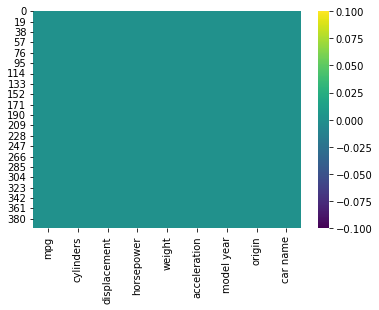

In [17]:
sns.heatmap(df.isna(), cbar=True, cmap='viridis')
plt.show()

In [18]:
print(df['horsepower'].str.isdigit().sum())
print(df.shape)

392
(398, 9)


In [19]:
df['horsepower'] = df['horsepower'].astype(float)

In [20]:
df['origin'].value_counts()

america    249
asia        79
europe      70
Name: origin, dtype: int64

In [21]:
df = pd.get_dummies(df, columns=['origin'])

In [22]:
df_attr = df.iloc[:, 0:7]

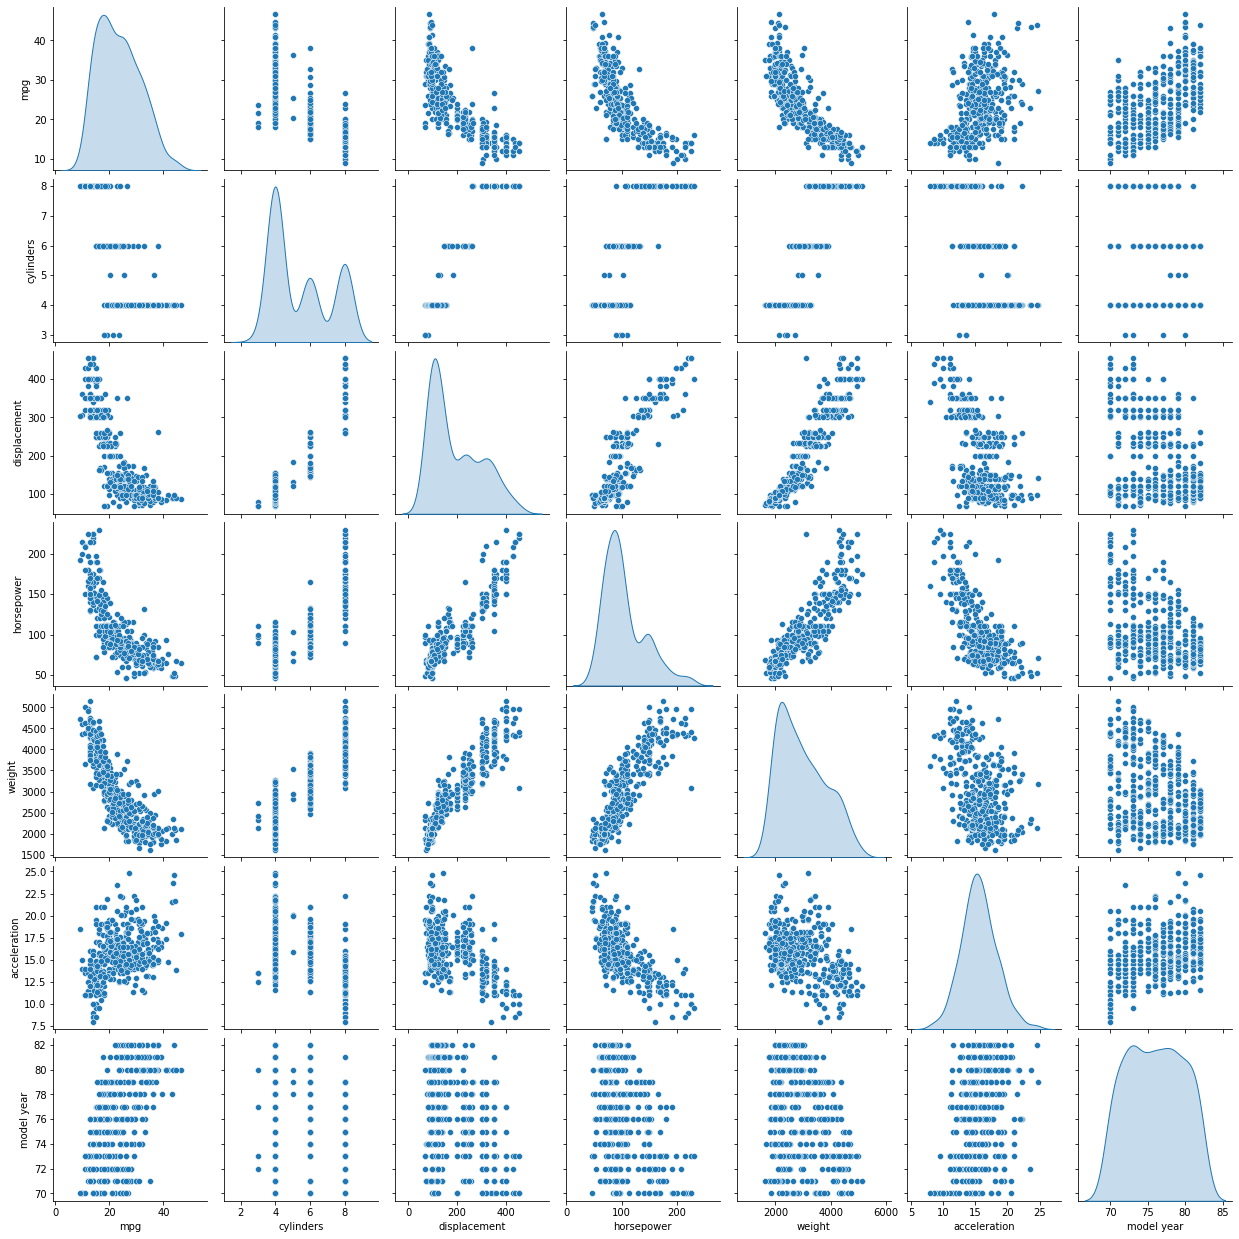

In [23]:
sns.pairplot(df_attr, diag_kind='kde')
plt.show()

In [24]:
y = df['mpg']
x = df.drop(['mpg', 'car name'], axis=1)

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=1)

In [26]:
reg_model = LinearRegression()
reg_model.fit(xtrain, ytrain)

LinearRegression()

In [27]:
reg_model.coef_

array([-0.39480797,  0.02894551, -0.02175221, -0.00735203,  0.06191937,
        0.83693389, -1.79884935,  0.59641569,  1.20243366])

In [28]:
reg_model.intercept_

-19.485884771453204

In [29]:
ypredict = reg_model.predict(x)

In [30]:
x_df = pd.DataFrame(x)
y_df = pd.DataFrame(y)
ypredict_df = pd.DataFrame(ypredict)
new_df = pd.concat([x_df, y_df, ypredict_df], axis=1)

In [31]:
new_df.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin_america', 
                  'origin_asia', 'origin_europe', 'mpg', 'pred_mpg']

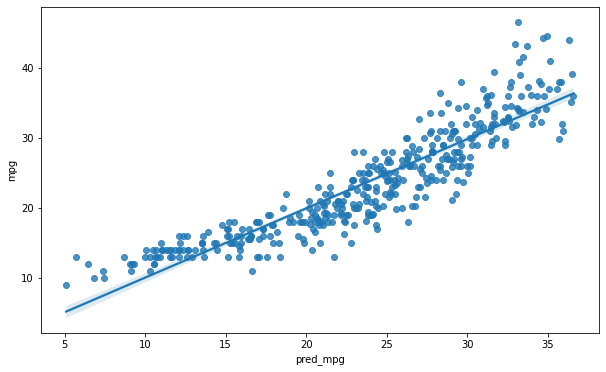

In [32]:
plt.figure(figsize=(10, 6))
sns.regplot(x='pred_mpg', y='mpg', data=new_df)
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [34]:
mean_absolute_error(new_df['mpg'], new_df['pred_mpg'])

2.5631580807771255

In [35]:
mean_absolute_percentage_error(new_df['pred_mpg'], new_df['mpg']) * 100

12.166508362048457

In [36]:
np.sqrt(mean_absolute_error(new_df['pred_mpg'], new_df['mpg']))

1.600986596064166

In [37]:
prediction = reg_model.predict(xtest)

mean_absolute_error(ytest, prediction)

2.3542812072204

In [38]:
reg_model.score(xtest, ytest)

0.8433135132808831